In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('loan_prediction1.csv')

# Display 5 rows of the dataset

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
data=data.drop('Loan_ID',axis=1)

In [12]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
columns=['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
data=data.dropna(subset=columns)

In [15]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
data['Self_Employed'].mode()[0]

'No'

In [17]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
data.isnull().sum()*100/len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [20]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [21]:
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [22]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

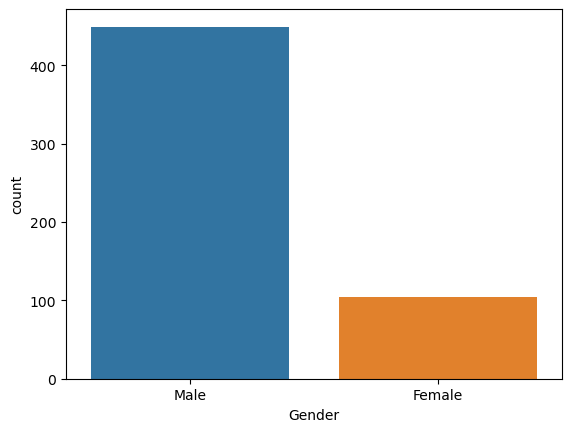

In [23]:
sns.countplot(data['Gender'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

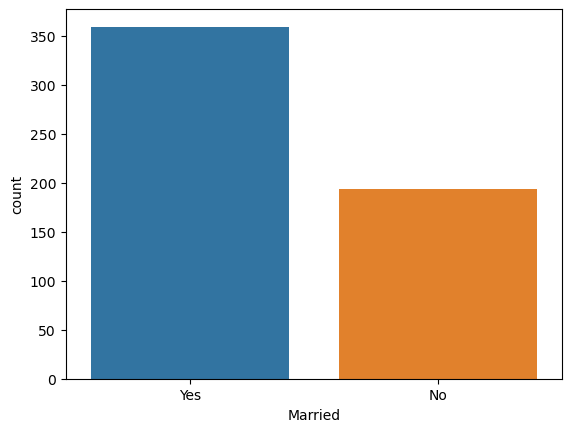

In [24]:
sns.countplot(data['Married'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

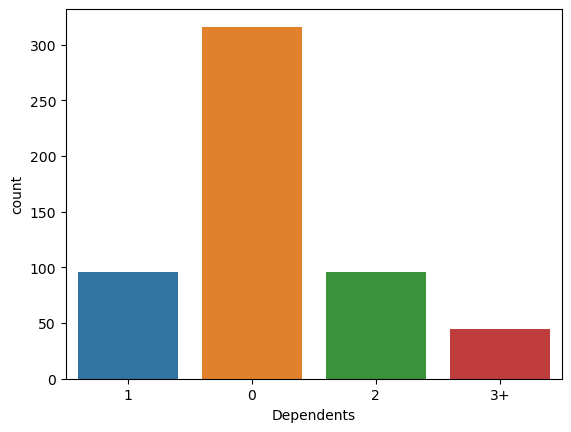

In [25]:
sns.countplot(data['Dependents'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

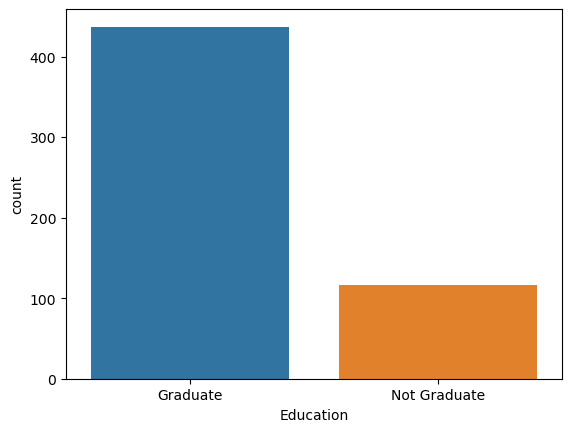

In [26]:
sns.countplot(data['Education'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

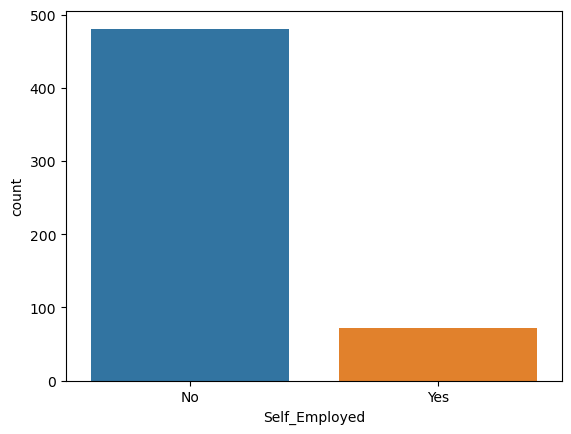

In [27]:
sns.countplot(data['Self_Employed'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

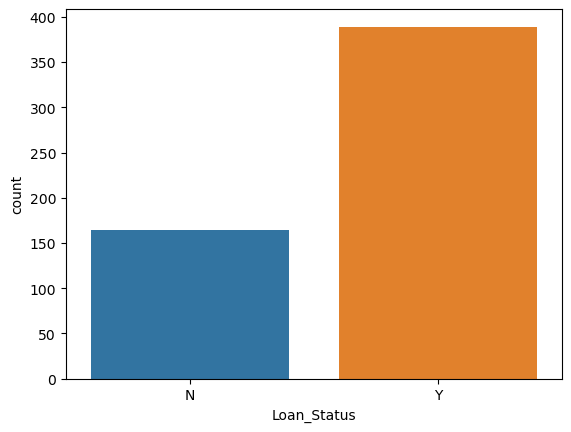

In [28]:
sns.countplot(data['Loan_Status'])

In [29]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
229,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y
64,Female,No,0,Graduate,No,4166,0.0,116.0,360.0,0.0,Semiurban,N
245,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N
459,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N


In [30]:
data['Dependents']=data['Dependents'].replace(to_replace="3+",value='4')

In [31]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [32]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [34]:
data['Gender'].unique()

array([1, 0])

In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [36]:
X=data.drop('Loan_Status',axis=1)

In [37]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [38]:
y=data['Loan_Status']

In [39]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [40]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [41]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [42]:
#Explotory Data Analysis

In [43]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [44]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [46]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [48]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
92,1,1,2,0,0,-0.348491,0.052909,-0.774052,0.279961,1.0,1
580,1,1,2,1,0,0.199660,-0.545638,0.702560,0.279961,1.0,2
373,1,0,1,1,0,-0.383894,0.107831,-0.416807,-2.468292,0.0,1
151,1,1,0,1,1,-0.465269,0.687632,0.071427,0.279961,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
159,1,1,0,1,0,-0.128694,1.304268,1.297968,0.279961,1.0,2
169,1,1,2,1,0,0.444625,-0.545638,0.643019,0.279961,1.0,2
553,1,1,0,0,0,-0.485906,0.221621,0.416764,0.279961,0.0,1
174,1,1,0,0,1,-0.168794,-0.303588,-0.702603,0.279961,1.0,2


In [49]:
y_test

609    1
92     1
580    1
373    0
151    1
      ..
159    1
169    1
553    0
174    0
194    1
Name: Loan_Status, Length: 111, dtype: int32

In [50]:
#Logistic Regression

In [51]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred1 = log.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, y_pred1)

0.8018018018018018

In [57]:
from sklearn.metrics import confusion_matrix
y_pred1 = log.predict(X_test)
cm1=confusion_matrix(y_test, y_pred1)
cm1

array([[12, 22],
       [ 0, 77]], dtype=int64)

<AxesSubplot:>

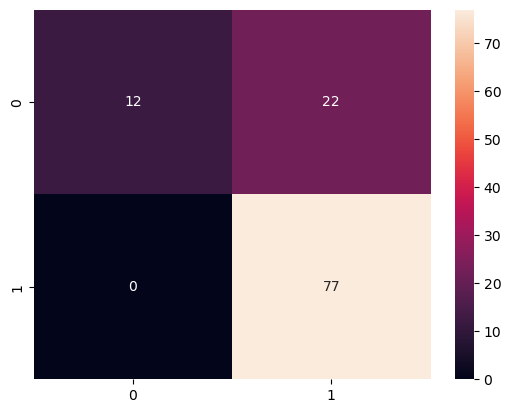

In [58]:
sns.heatmap(cm1, annot=True)

In [59]:
#SVC

In [60]:
from sklearn import svm

In [61]:
svm =svm.SVC()

In [62]:
svm.fit(X_train, y_train)

SVC()

In [63]:
y_pred2 = svm.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred2)

0.7927927927927928

In [65]:
from sklearn.metrics import confusion_matrix
y_pred2 = svm.predict(X_test)
cm2=confusion_matrix(y_test, y_pred2)
cm2

array([[11, 23],
       [ 0, 77]], dtype=int64)

<AxesSubplot:>

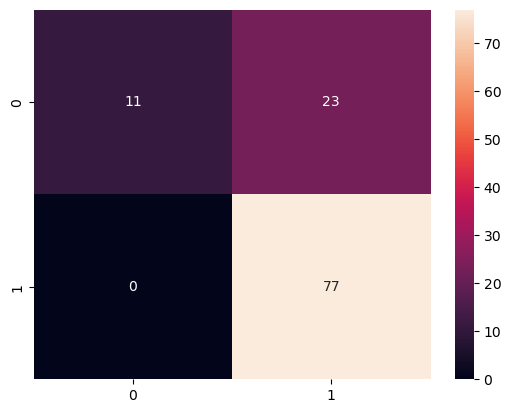

In [66]:
sns.heatmap(cm2, annot=True)

In [67]:
#KNeighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred3 = knn.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
accuracy_score(y_test, y_pred3)

0.7117117117117117

In [73]:
from sklearn.metrics import confusion_matrix
y_pred3 = knn.predict(X_test)
cm3=confusion_matrix(y_test, y_pred3)
cm3

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[ 9, 25],
       [ 7, 70]], dtype=int64)

<AxesSubplot:>

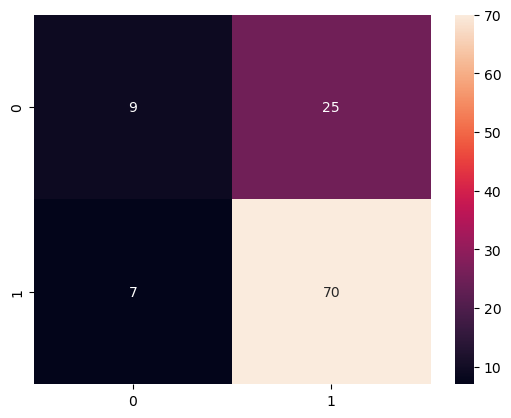

In [74]:
sns.heatmap(cm3, annot=True)

In [75]:
score = []

for k in range(1,40):
  knn = KNeighborsClassifier()
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [76]:
score

[0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117,
 0.7117117117117117]

In [77]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6486486486486487

In [78]:
#Non-Linear ML Algorithms

In [79]:
#Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier()

In [82]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
y_pred4 = dt.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred4)

0.7657657657657657

In [85]:
from sklearn.metrics import confusion_matrix
y_pred4 = dt.predict(X_test)
cm4=confusion_matrix(y_test, y_pred4)
cm4

array([[23, 11],
       [15, 62]], dtype=int64)

<AxesSubplot:>

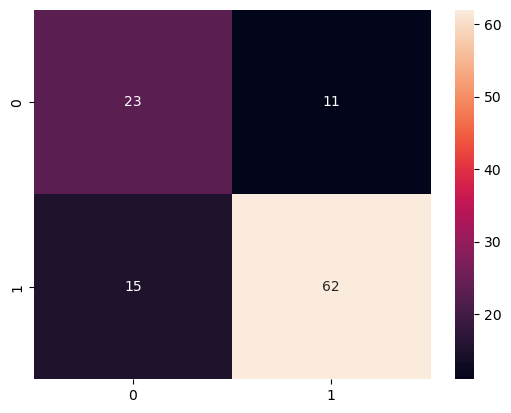

In [86]:
sns.heatmap(cm4, annot=True)

In [87]:
#Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier()

In [90]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
y_pred5 = rf.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred5)

0.7657657657657657

In [93]:
from sklearn.metrics import confusion_matrix
y_pred5 = rf.predict(X_test)
cm5=confusion_matrix(y_test, y_pred5)
cm5

array([[13, 21],
       [ 5, 72]], dtype=int64)

<AxesSubplot:>

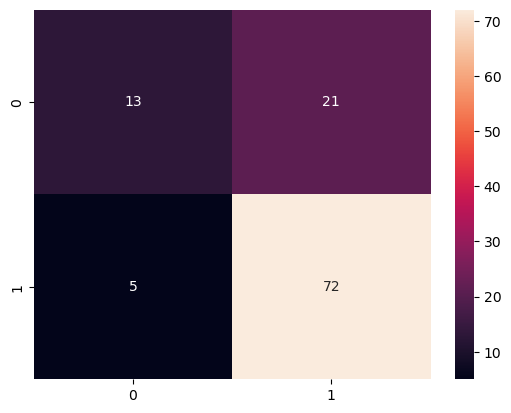

In [94]:
sns.heatmap(cm5, annot=True)

In [95]:
#Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbc = GradientBoostingClassifier()

In [98]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [99]:
y_pred6 =gbc.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred6)

0.7927927927927928

In [101]:
from sklearn.metrics import confusion_matrix
y_pred6 = gbc.predict(X_test)
cm6=confusion_matrix(y_test, y_pred6)
cm6

array([[13, 21],
       [ 2, 75]], dtype=int64)

<AxesSubplot:>

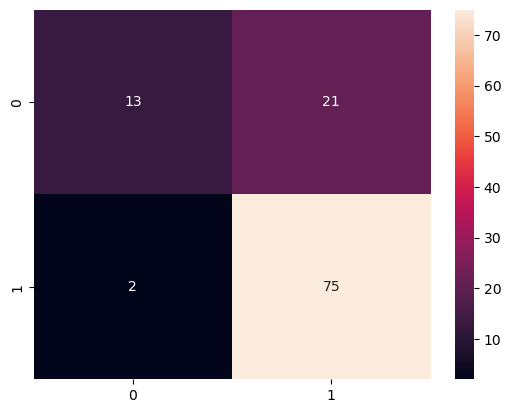

In [102]:
sns.heatmap(cm6, annot=True)

In [103]:
#naive bayes classifier

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
nb=GaussianNB()

In [106]:
nb.fit(X_train,y_train)

GaussianNB()

In [107]:
y_pred7=nb.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred7)

0.8288288288288288

In [109]:
from sklearn.metrics import confusion_matrix
y_pred7 = nb.predict(X_test)
cm7=confusion_matrix(y_test, y_pred7)
cm7

array([[15, 19],
       [ 0, 77]], dtype=int64)

<AxesSubplot:>

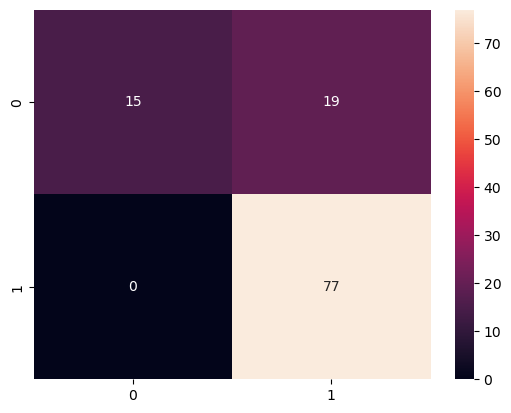

In [110]:
sns.heatmap(cm7, annot=True)

In [111]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GBC','NB'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6),
                                  accuracy_score(y_test,y_pred7)]})

In [112]:
final_data

,Models,ACC
0,LR,0.801802
1,SVM,0.792793
2,KNN,0.711712
3,DT,0.765766
4,RF,0.765766
5,GBC,0.792793
6,NB,0.828829


In [113]:
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

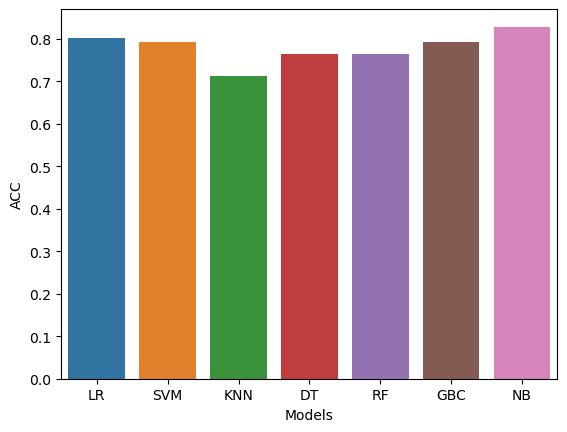

In [114]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [115]:
#Save the Model

In [116]:
X= data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [120]:
nb=GaussianNB()

In [121]:
nb.fit(X_train,y_train)

GaussianNB()

In [122]:
import joblib

In [123]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [124]:
model = joblib.load('loan_status_predict')

In [125]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education': 0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [126]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [127]:
result = model.predict(df)

In [128]:
if result==1:
    print("Loan Aproved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [129]:
#GUI

In [130]:
from tkinter import *
import joblib
import pandas as pd

In [131]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)

        
        
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()